In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("../dataset.csv")

In [6]:
# Checking the null values
df.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
df.drop('Person ID', axis=1, inplace=True)

In [8]:
df = df.fillna("Nothing")

df["BMI Category"] = df["BMI Category"].replace("Normal Weight", "Normal")

In [9]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
label_encoder=LabelEncoder()
cat_cols=['Gender','Occupation','BMI Category','Sleep Disorder']
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

df.tail(2)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
372,0,59,5,8.1,9,75,3,2,140/95,68,7000,2
373,0,59,5,8.1,9,75,3,2,140/95,68,7000,2


In [10]:
df[['Systolic BP', 'Diastolic BP']] = df['Blood Pressure'].str.split('/', expand=True)
    
# Convert the new columns to numeric type
df[['Systolic BP', 'Diastolic BP']] = df[['Systolic BP', 'Diastolic BP']].apply(pd.to_numeric)
    
# Drop the original 'Blood Pressure' column
df = df.drop('Blood Pressure', axis=1)

df.head(1)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic BP,Diastolic BP
0,1,27,9,6.1,6,42,6,2,77,4200,1,126,83


In [11]:
# Group data by stress level and calculate the mean for each column
grouped_data = df.groupby('Stress Level').mean()

# Display the mean values for each stress level
print(grouped_data)

                Gender        Age  Occupation  Sleep Duration  \
Stress Level                                                    
3             0.056338  54.169014    3.197183        8.226761   
4             0.128571  39.900000    4.971429        7.030000   
5             0.970149  40.313433    3.104478        7.483582   
6             0.804348  33.065217    2.130435        7.454348   
7             0.760000  42.680000    6.000000        6.468000   
8             0.514286  39.742857    3.285714        6.050000   

              Quality of Sleep  Physical Activity Level  BMI Category  \
Stress Level                                                            
3                     8.971831                54.718310      0.901408   
4                     7.671429                55.785714      0.800000   
5                     7.895522                74.253731      0.149254   
6                     7.000000                67.152174      0.347826   
7                     6.000000           

In [12]:
df_copy = df.copy()
df_copy = df_copy.drop(['Occupation'], axis=1)


In [13]:
# Group data by stress level and calculate the mean for each column
grouped_data = df_copy.groupby('Stress Level').mean()

# Display the mean values for each stress level
print(grouped_data)

                Gender        Age  Sleep Duration  Quality of Sleep  \
Stress Level                                                          
3             0.056338  54.169014        8.226761          8.971831   
4             0.128571  39.900000        7.030000          7.671429   
5             0.970149  40.313433        7.483582          7.895522   
6             0.804348  33.065217        7.454348          7.000000   
7             0.760000  42.680000        6.468000          6.000000   
8             0.514286  39.742857        6.050000          5.857143   

              Physical Activity Level  BMI Category  Heart Rate  Daily Steps  \
Stress Level                                                                   
3                           54.718310      0.901408   67.098592  6132.394366   
4                           55.785714      0.800000   66.828571  6422.857143   
5                           74.253731      0.149254   70.074627  7616.417910   
6                           67.

In [14]:
# Calculate correlations for stress level and all other columns
correlation_matrix = df_copy.corr()
print(correlation_matrix['Stress Level'])

Gender                     0.396018
Age                       -0.422344
Sleep Duration            -0.811023
Quality of Sleep          -0.898752
Physical Activity Level   -0.034134
Stress Level               1.000000
BMI Category               0.163665
Heart Rate                 0.670026
Daily Steps                0.186829
Sleep Disorder            -0.036058
Systolic BP                0.102818
Diastolic BP               0.091811
Name: Stress Level, dtype: float64


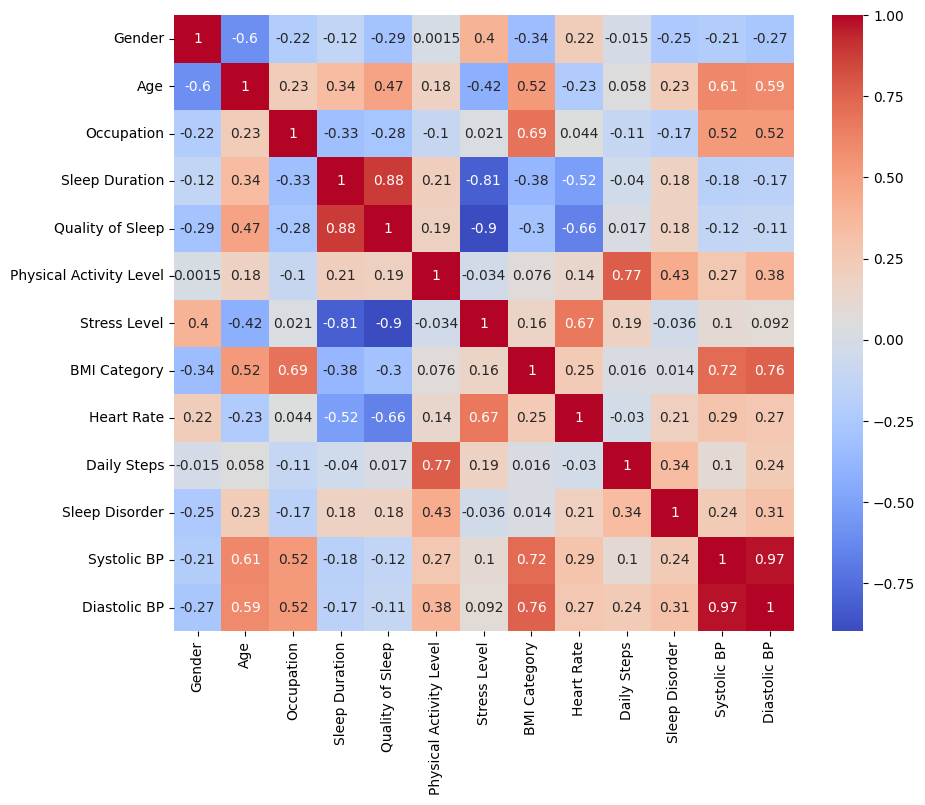

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()